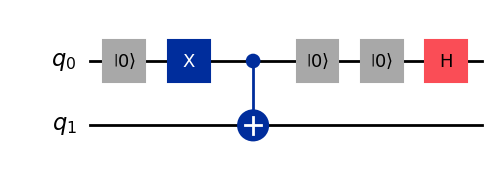

In [3]:
from qiskit import QuantumCircuit, transpile

qc=QuantumCircuit(2)
#Bu satır, ilk qubit'i (0. qubit) sıfırlar. reset işlemi, qubit'i ∣0⟩∣0⟩ durumuna getirir
qc.reset(0)
# Bu satır, ilk qubit'e X (Pauli-X veya NOT) kapısı uygular. Bu kapı, qubit'in durumunu tersine çevirir. Eğer qubit ∣0⟩∣0⟩ durumundaysa, ∣1⟩∣1⟩ durumuna geçer.
qc.x(0)
#Bu satır, ilk qubit'i kontrol eden ve ikinci qubit'e uygulanan bir CNOT (kontrollü-NOT) kapısı uygular. Eğer kontrol qubit'i (00) ∣1⟩∣1⟩ durumundaysa, hedef qubit'in (11) durumu tersine çevrilir.
qc.cx(0,1)
# Bu iki satır, ilk qubit'i tekrar sıfırlar. Bu, qubit'i tekrar ∣0⟩∣0⟩ durumuna getirir.
qc.reset(0)
qc.reset(0)
# Bu satır, ilk qubit'e Hadamard (H) kapısı uygular. Hadamard kapısı, qubit'i süperpozisyon durumuna getirir:𝐻∣0⟩=∣0⟩+∣1⟩/2
qc.h(0)
qc.draw(output='mpl')

 QuantumCircuit sınıfı, kuantum devrelerini oluşturmak için kullanılırken, transpile fonksiyonu devreleri belirli bir backend için optimize etmek amacıyla kullanılabilir 
 

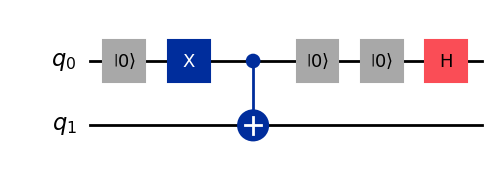

In [5]:
#Bu işlem, kuantum devrelerinin belirli bir donanım üzerinde daha verimli çalışmasını sağlamak için kritik öneme sahiptir. 
#Optimizasyon işlemi, devredeki gereksiz kapıları kaldırır, kapıları yeniden düzenler ve donanıma özgü kısıtlamaları göz önünde bulundurarak devreyi dönüştürür.
qc_basic_transpile=transpile(qc,optimization_level=3)
qc_basic_transpile.draw(output='mpl',style='iqp')

Optimization Levels:

Level 0: En az optimizasyon, devreyi minimum değişiklikle hedef donanıma uygun hale getirir.

Level 1: Hafif optimizasyon, devredeki bazı basit dönüşümleri uygular.

Level 2: Orta seviye optimizasyon, devrede daha karmaşık optimizasyonlar yapar.

Level 3: En yüksek optimizasyon, devreyi maksimum performans için optimize eder.


Bu optimizasyon işlemi, devredeki gereksiz reset kapılarını kaldırarak devrenin daha verimli çalışmasını sağlar.
Bu, kuantum devrelerinin daha hızlı çalışmasına ve kaynakların daha verimli kullanılmasına yardımcı olur.








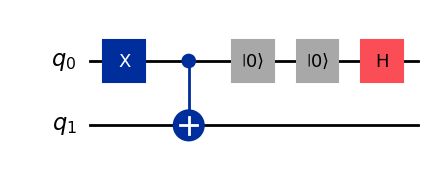

In [7]:
from qiskit.transpiler.passes.optimization.remove_reset_in_zero_state import RemoveResetInZeroState
from qiskit.converters import circuit_to_dag,dag_to_circuit
remove_reset=RemoveResetInZeroState()
remove_reset(qc).draw('mpl')
# RemoveResetInZeroState: Qubit zaten sıfır (|0⟩) durumundaysa reset işlemini kaldırmak için kullanılır.
# circuit_to_dag: Kuantum devresini Directed Acyclic Graph (DAG) formatına dönüştürmek için kullanılır.
# dag_to_circuit: DAG formatındaki kuantum devresini tekrar kuantum devresine dönüştürmek için kullanılır.

In [9]:
# from dynacir.dynacir_passes import collecResets
# Bu satır, collectResets fonksiyonundan bir nesne oluşturur. Bu nesne, reset kapılarını optimize etmek için kullanılacaktır.
# collect_resets=collecResets()
# Bu satır, collectResets optimizasyonunu qc kuantum devresine uygular. Sonuç olarak, optimize edilmiş reset kapıları içeren bir kuantum devresi elde edilir.
# circuit_with_less_resets=collect_resets(qc)
# circuit_with_less_resets.draw(outpput='mpl')